In [1]:
import os
import gc
import warnings

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Configuration
warnings.simplefilter('ignore')
pd.set_option('display.max_columns', None)
sns.set_style("darkgrid")
colors = sns.color_palette('Set2')

In [2]:
TRAIN_DIR = "../545 Project/train_files"

In [5]:
%%time

df_prices = pd.read_csv(os.path.join(TRAIN_DIR, 'stock_prices.csv'))
df_prices_supp = pd.read_csv(os.path.join("../545 Project/supplemental_files", 'stock_prices.csv'))

stock_list = pd.read_csv(os.path.join("../545 Project/stock_list.csv"))

CPU times: user 1.6 s, sys: 272 ms, total: 1.87 s
Wall time: 1.93 s


In [8]:
df = pd.concat([df_prices, df_prices_supp], ignore_index=True)
print(df.columns)

Index(['RowId', 'Date', 'SecuritiesCode', 'Open', 'High', 'Low', 'Close',
       'Volume', 'AdjustmentFactor', 'ExpectedDividend', 'SupervisionFlag',
       'Target'],
      dtype='object')


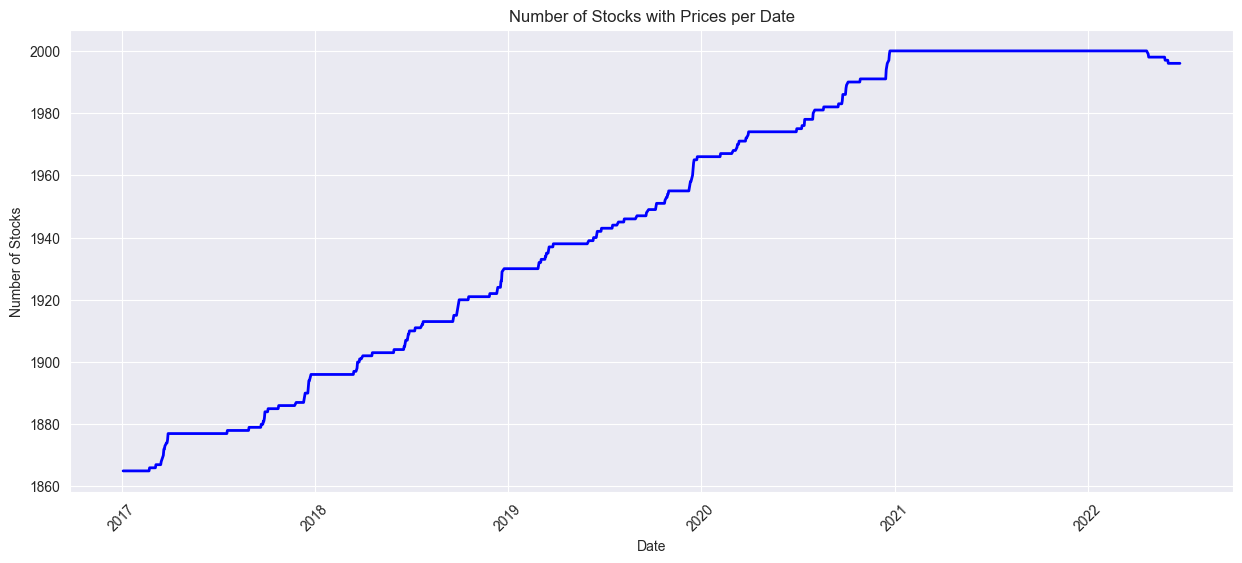

In [9]:

df['Date'] = pd.to_datetime(df['Date'])

# Group by 'Date' and count unique 'SecuritiesCode'
df_stocks_per_date = df.groupby('Date')['SecuritiesCode'].nunique().reset_index()
df_stocks_per_date.columns = ['Date', 'NumStocks']

# Plotting
plt.figure(figsize=(15, 6))  # Set the figure size as needed
plt.plot(df_stocks_per_date['Date'], df_stocks_per_date['NumStocks'], marker='', color='blue', linewidth=2)
plt.title('Number of Stocks with Prices per Date')
plt.xlabel('Date')
plt.ylabel('Number of Stocks')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate date labels for better readability

# Show the plot
plt.show()

In [11]:
sec_info = stock_list[['SecuritiesCode', '33SectorName', '17SectorName']]
df = pd.merge(df, sec_info, on='SecuritiesCode')
#df.head()
print(df.columns)

Index(['RowId', 'Date', 'SecuritiesCode', 'Open', 'High', 'Low', 'Close',
       'Volume', 'AdjustmentFactor', 'ExpectedDividend', 'SupervisionFlag',
       'Target', '33SectorName_x', '17SectorName_x', '33SectorName_y',
       '17SectorName_y'],
      dtype='object')


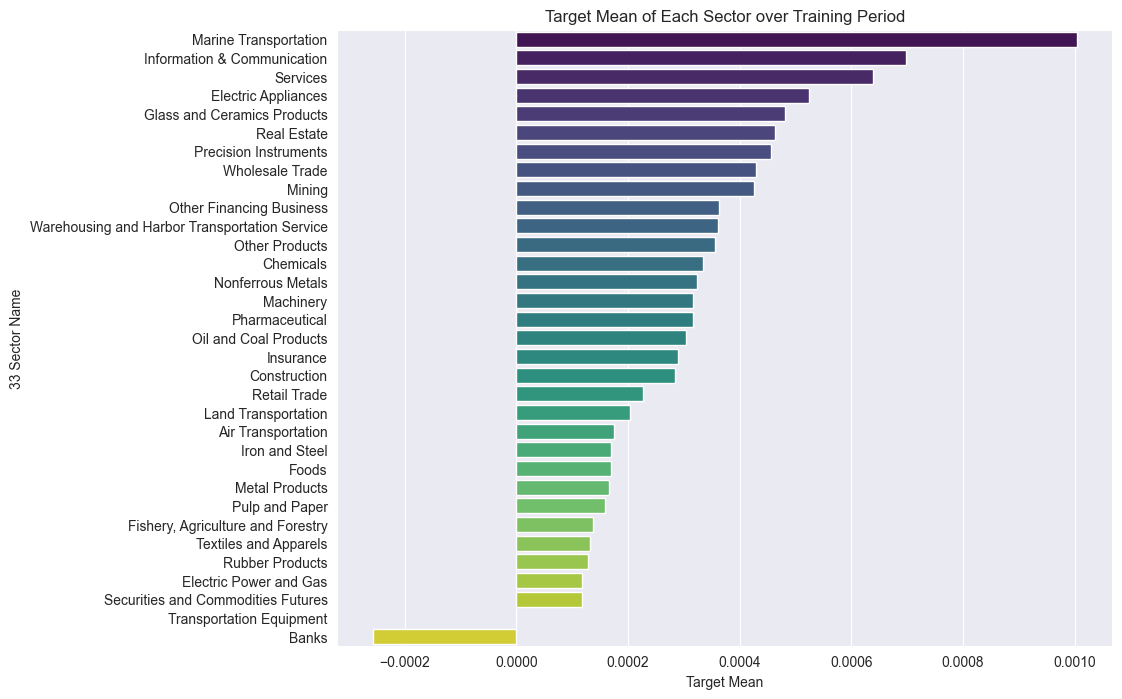

In [16]:
target_mean_33sec = df.groupby('33SectorName_x')['Target'].mean()

# Sort the means
target_mean_33sec = target_mean_33sec.sort_values(ascending=False)  # Changed to ascending for horizontal bars

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))  # Adjusted size for better visibility
sns.barplot(x=target_mean_33sec.values, y=target_mean_33sec.index, palette='viridis', ax=ax)  # Switched x and y
ax.set_title("Target Mean of Each Sector over Training Period")
ax.set_xlabel("Target Mean")
ax.set_ylabel("33 Sector Name")
plt.show()

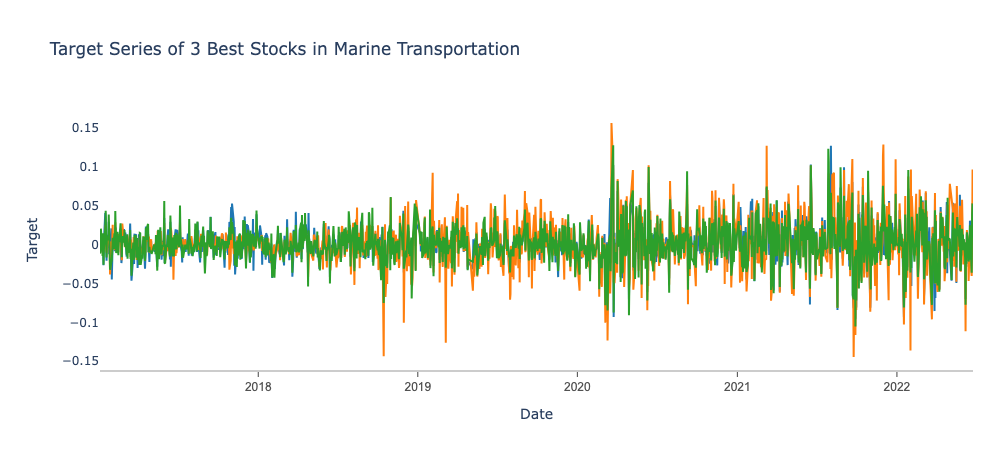

In [22]:
import plotly.graph_objects as go

fig = go.Figure()

colors = {
    9101: '#1f77b4',  # Blue
    9107: '#ff7f0e',  # Orange
    9104: '#2ca02c'   # Green
}

for stock_code in [9101, 9107, 9104]:
    df_ = df[df['SecuritiesCode'] == stock_code]
    # Sort data by date to ensure the line plots correctly
    df_ = df_.sort_values(by='Date')
    fig.add_trace(go.Scatter(
        x=df_['Date'],
        y=df_['Target'],
        mode='lines',
        name=str(stock_code),
        line=dict(color=colors[stock_code])
    ))

fig.update_layout(
    title="Target Series of 3 Best Stocks in Marine Transportation",
    xaxis_title="Date",
    yaxis_title="Target",
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        ),
    ),
    yaxis=dict(
        showgrid=True,
        zeroline=False,
        showline=False,
        showticklabels=True,
    ),
    autosize=False,
    margin=dict(
        autoexpand=False,
        l=100,
        r=20,
        t=110,
    ),
    showlegend=True,
    plot_bgcolor='white'
)

fig.show()